In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
start_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
start_date

('2017-08-23',)

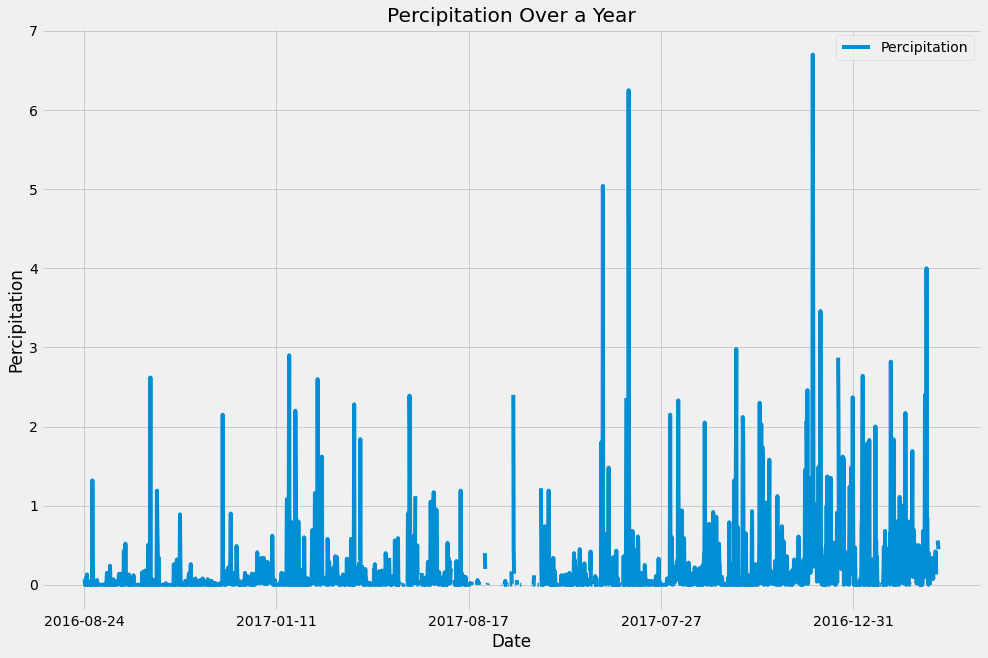

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.datetime.strptime(start_date.date, '%Y-%m-%d').date()
# Calculate the date one year from the last date in data set.
year_ago = recent_date - dt.timedelta(days=364)
year_ago

# Perform a query to retrieve the data and precipitation scores
recent_query =session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_ago).all()
recent_query

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(recent_query, columns=["Date", "Percipitation"])
measurement_df.set_index("Date", inplace=True)

# Sort the dataframe by date
measurement_df.sort_index()
measurement_df

# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot(figsize=(15,10))
plt.title("Percipitation Over a Year")
plt.xlabel("Date")
plt.ylabel("Percipitation")
plt.show()



In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,Percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [44]:
# Close Session
session.close()